In [1]:
%cd /home/ubuntu/Qwen-Image-Edit-Angles

/home/ubuntu/Qwen-Image-Edit-Angles


In [ ]:
import math
from pathlib import Path
from collections import defaultdict
import statistics

import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import lpips
import torch
import torchvision.transforms.v2 as T
import torchvision.transforms.v2.functional as TF
from pydantic import BaseModel

from qwenimage.reporting.visualize_barplot import compare_sets, compare_sets_with_timing
from qwenimage.experiment import ExperimentConfig
from qwenimage.experiments.experiments_qwen import ExperimentRegistry

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Skipping import of cpp extensions due to incompatible torch version 2.9.1+cu128 for torchao version 0.14.1             Please see https://github.com/pytorch/ao/issues/2919 for more info
TMA benchmarks will be running without grid constant TMA descriptor.
2025-11-15 00:27:46.066093: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the envi

/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


Loading model from: /home/ubuntu/.local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


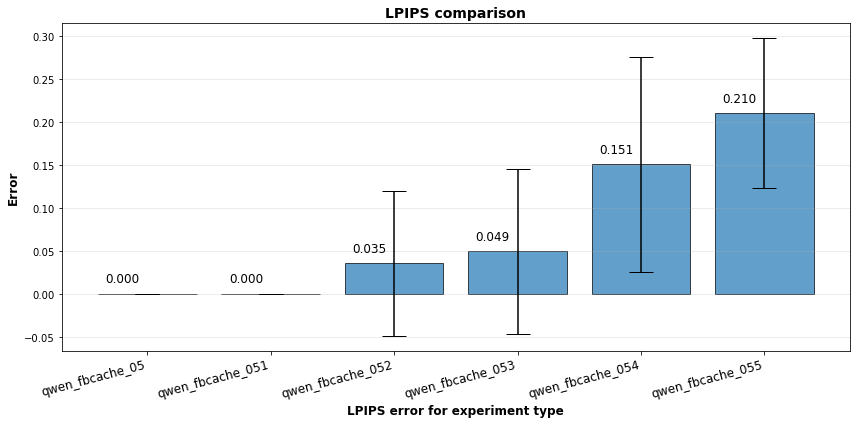

In [4]:
compare_sets(ExperimentSet.create(
    "qwen_base",
    "qwen_fbcache_05",
    "qwen_fbcache_051",
    "qwen_fbcache_052",
    "qwen_fbcache_053",
    "qwen_fbcache_054",
    "qwen_fbcache_055",
))


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/ubuntu/.local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


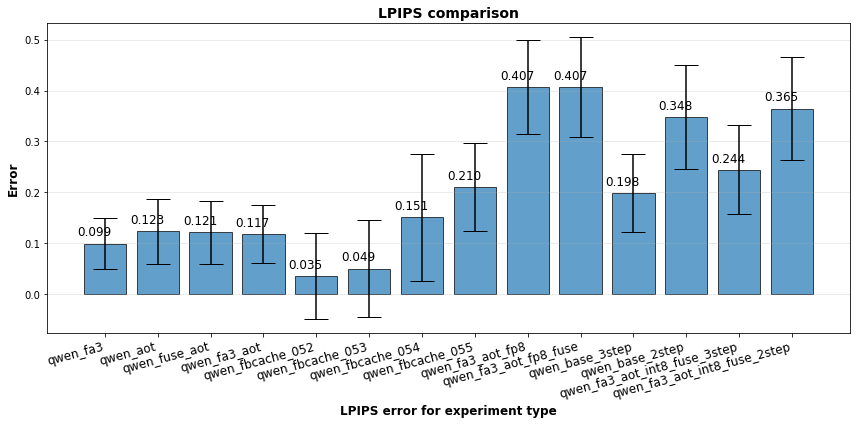

In [5]:
experiment_names = [    
    "qwen_base",
    "qwen_fa3",
    "qwen_aot",
    "qwen_fuse_aot",
    "qwen_fa3_aot",

    "qwen_fbcache_052",
    "qwen_fbcache_053",
    "qwen_fbcache_054",
    "qwen_fbcache_055",

    "qwen_fa3_aot_fp8",
    "qwen_fa3_aot_fp8_fuse",

    "qwen_base_3step",
    "qwen_base_2step",
    "qwen_fa3_aot_int8_fuse_3step",
    "qwen_fa3_aot_int8_fuse_2step"


]

compare_sets(ExperimentSet.create(
    *experiment_names
))


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/ubuntu/.local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


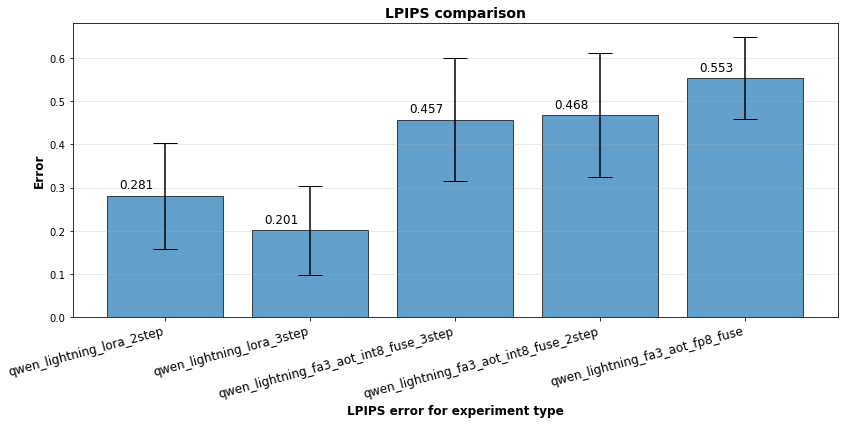

In [6]:
compare_sets(ExperimentSet.create(
    "qwen_lightning_lora",
    "qwen_lightning_lora_2step",
    "qwen_lightning_lora_3step",
    "qwen_lightning_lora_2step",
    "qwen_lightning_fa3_aot_int8_fuse_3step",
    "qwen_lightning_fa3_aot_int8_fuse_2step",
    "qwen_lightning_fa3_aot_fp8_fuse",
))

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/ubuntu/.local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


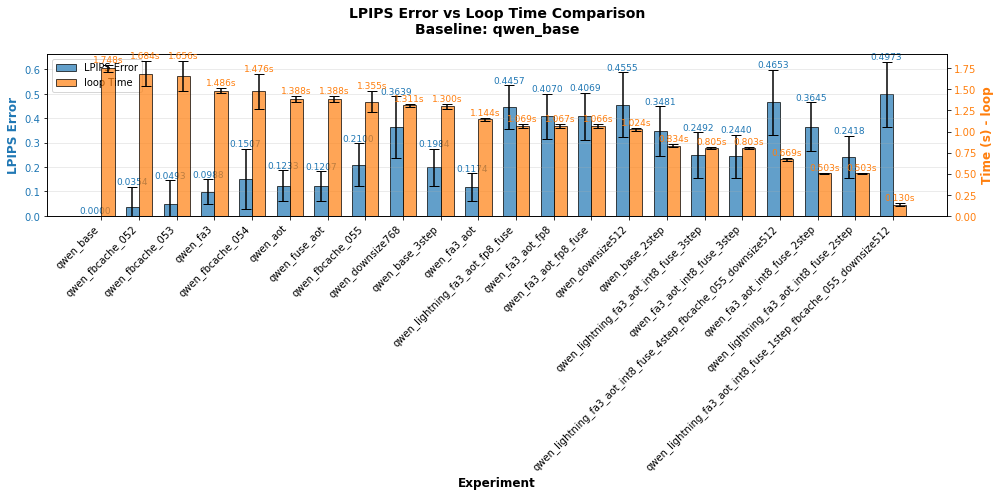

experiment  lpips_mean  lpips_std  \
0                                           qwen_base    0.000000   0.000000   
5                                    qwen_fbcache_052    0.035377   0.083969   
6                                    qwen_fbcache_053    0.049340   0.095783   
1                                            qwen_fa3    0.098819   0.050530   
7                                    qwen_fbcache_054    0.150750   0.124720   
2                                            qwen_aot    0.123254   0.064058   
3                                       qwen_fuse_aot    0.120702   0.061823   
8                                    qwen_fbcache_055    0.210041   0.087366   
18                                   qwen_downsize768    0.363855   0.125979   
11                                    qwen_base_3step    0.198440   0.076125   
4                                        qwen_fa3_aot    0.117448   0.056472   
17                    qwen_lightning_fa3_aot_fp8_fuse    0.445665   0.089643   
9                                    qwen_fa3_aot_fp8    0.406982   0.092241   
10                              qwen_fa3_aot_fp8_fuse    0.406895   0.097481   
19                                   qwen_downsize512    0.455472   0.132662   
12                                    qwen_base_2step    0.348145   0.101625   
15             qwen_lightning_fa3_aot_int8_fuse_3step    0.249194   0.093584   
13                       qwen_fa3_aot_int8_fuse_3step    0.243971   0.087880   
20  qwen_lightning_fa3_aot_int8_fuse_4step_fbcache...    0.465322   0.132823   
14                       qwen_fa3_aot_int8_fuse_2step    0.364536   0.101150   
16             qwen_lightning_fa3_aot_int8_fuse_2step    0.241812   0.086196   
21  qwen_lightning_fa3_aot_int8_fuse_1step_fbcache...    0.497299   0.133223   

    time_mean  time_std  
0    1.748370  0.038003  
5    1.683651  0.147396  
6    1.656244  0.176397  
1    1.486262  0.024040  
7    1.476016  0.204040  
2    1.387999  0.033911  
3    1.387822  0.034065  
8    1.355392  0.119775  
18   1.311494  0.014959  
11   1.300353  0.027552  
4    1.143772  0.020417  
17   1.068549  0.023564  
9    1.066953  0.023052  
10   1.065638  0.022780  
19   1.023894  0.018995  
12   0.833539  0.018778  
15   0.804929  0.015162  
13   0.803056  0.015583  
20   0.668730  0.014523  
14   0.503335  0.009735  
16   0.502978  0.010024  
21   0.130142  0.016603

In [8]:
# Example: All optimization experiments
experiment_names = [
    "qwen_base",
    "qwen_fa3",
    "qwen_aot",
    "qwen_fuse_aot",
    "qwen_fa3_aot",
    "qwen_fbcache_052",
    "qwen_fbcache_053",
    "qwen_fbcache_054",
    "qwen_fbcache_055",
    "qwen_fa3_aot_fp8",
    "qwen_fa3_aot_fp8_fuse",
    "qwen_base_3step",
    "qwen_base_2step",
    "qwen_fa3_aot_int8_fuse_3step",
    "qwen_fa3_aot_int8_fuse_2step",

    "qwen_lightning_fa3_aot_int8_fuse_3step",
    "qwen_lightning_fa3_aot_int8_fuse_2step",
    "qwen_lightning_fa3_aot_fp8_fuse",

    "qwen_downsize768",
    "qwen_downsize512",

    "qwen_lightning_fa3_aot_int8_fuse_4step_fbcache_055_downsize512",
    "qwen_lightning_fa3_aot_int8_fuse_1step_fbcache_055_downsize512",
]

df_all = compare_sets_with_timing(
    ExperimentSet.create(*experiment_names),
    profile_target="loop",
    sort_by="time"
)

# Display the combined data
df_all


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/ubuntu/.local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


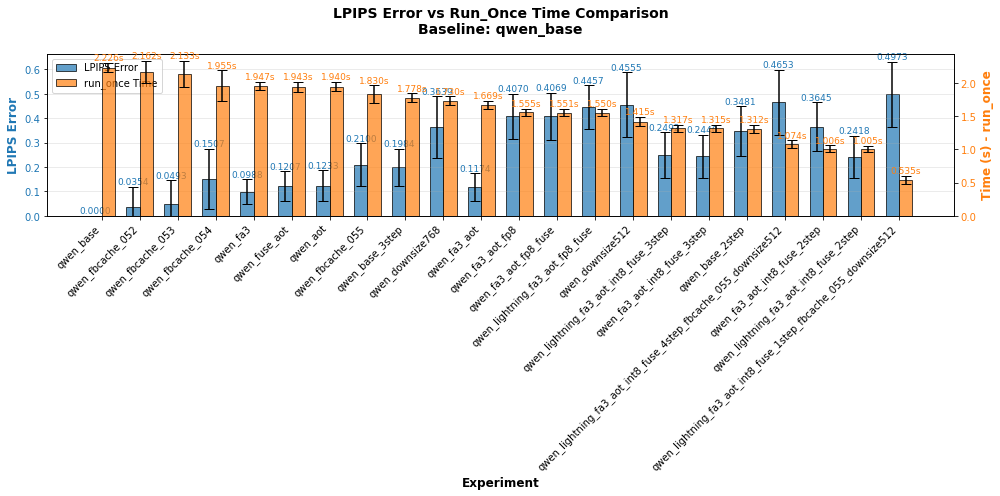

experiment  lpips_mean  lpips_std  \
0                                           qwen_base    0.000000   0.000000   
5                                    qwen_fbcache_052    0.035377   0.083969   
6                                    qwen_fbcache_053    0.049340   0.095783   
7                                    qwen_fbcache_054    0.150750   0.124720   
1                                            qwen_fa3    0.098819   0.050530   
3                                       qwen_fuse_aot    0.120702   0.061823   
2                                            qwen_aot    0.123254   0.064058   
8                                    qwen_fbcache_055    0.210041   0.087366   
11                                    qwen_base_3step    0.198440   0.076125   
18                                   qwen_downsize768    0.363855   0.125979   
4                                        qwen_fa3_aot    0.117448   0.056472   
9                                    qwen_fa3_aot_fp8    0.406982   0.092241   
10                              qwen_fa3_aot_fp8_fuse    0.406895   0.097481   
17                    qwen_lightning_fa3_aot_fp8_fuse    0.445665   0.089643   
19                                   qwen_downsize512    0.455472   0.132662   
15             qwen_lightning_fa3_aot_int8_fuse_3step    0.249194   0.093584   
13                       qwen_fa3_aot_int8_fuse_3step    0.243971   0.087880   
12                                    qwen_base_2step    0.348145   0.101625   
20  qwen_lightning_fa3_aot_int8_fuse_4step_fbcache...    0.465322   0.132823   
14                       qwen_fa3_aot_int8_fuse_2step    0.364536   0.101150   
16             qwen_lightning_fa3_aot_int8_fuse_2step    0.241812   0.086196   
21  qwen_lightning_fa3_aot_int8_fuse_1step_fbcache...    0.497299   0.133223   

    time_mean  time_std  
0    2.225736  0.067141  
5    2.162202  0.160729  
6    2.133067  0.190319  
7    1.955050  0.232325  
1    1.947071  0.061501  
3    1.942934  0.073606  
2    1.940447  0.068892  
8    1.830056  0.131404  
11   1.777741  0.063624  
18   1.730498  0.064987  
4    1.668898  0.060596  
9    1.555308  0.056101  
10   1.551363  0.054497  
17   1.550415  0.054403  
19   1.415100  0.068592  
15   1.316805  0.049415  
13   1.315020  0.051983  
12   1.311674  0.060686  
20   1.074434  0.058646  
14   1.006411  0.052007  
16   1.004707  0.051529  
21   0.535343  0.060678

In [9]:

compare_sets_with_timing(
    ExperimentSet.create(
       *experiment_names
    ),
    profile_target="run_once",
    match_strategy="contain",
    sort_by="time"
)
